In [11]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle

In [12]:
# !pip install opencv-python

In [13]:
file_list = []
class_list = []

DATADIR = "data"

# All the categories you want your neural network to detect
CATEGORIES = ["airplane", "apple","axe","banana","baseball",
              "bee","bus","car","diamond","grapes","grass","hand",
              "pineapple","tornado"]

In [14]:
IMG_SIZE = 28

In [15]:
# Checking or all images in the data folder
for category in CATEGORIES :
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
#         plt.imshow(img_array, cmap ='gray')
#         plt.show()
#         break
#     break

training_data = []

In [16]:
print(img_array.shape)

(28, 28)


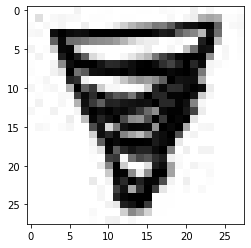

In [17]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap ="gray")
plt.show()

In [18]:
def create_training_data():
    for category in CATEGORIES :
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try :
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE), interpolation = cv2.INTER_AREA)
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [19]:
random.shuffle(training_data)

X = [] #features
y = [] #labels

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [20]:
# Creating the files containing all the information about your model
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)